# Pymaceuticals Inc.
---

Three observations made from analysis:

1) Capomulin and Ramicane are more effective on the mice as the tumor volume has decresed with time and the mean and median are almost same for both. as the standard deviation for Capomulin is lower , it can be said it is a bit more effective.
2) Number of mice administered Capomulin and Ramicane is more than other drugs.
3) When looking at a mouse treated with Capomulin the tumor volume decreased with time. The line plot shows for the mouse that tumor volume was minimum at timepont 35.


 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single DataFrame
merge_studydf = pd.merge(study_results,mouse_metadata, how= 'left', on= ["Mouse ID", "Mouse ID"],)


# Display the data table for preview
merge_studydf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
merge_studydf.shape

(1893, 8)

In [5]:
# Checking the number of mice.
mice_count= len(merge_studydf['Mouse ID'].unique())
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = merge_studydf[merge_studydf.duplicated(["Mouse ID", "Timepoint" ], keep= False)]
duplicate_mouse = duplicate_mouse_df['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = merge_studydf[merge_studydf["Mouse ID"]!= "g989"]
clean_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
new_mice_count =len(clean_study_df['Mouse ID'].unique())
new_mice_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_df= clean_study_df.groupby(["Drug Regimen"])
mean_tumor = drug_regimen_df['Tumor Volume (mm3)'].mean()
median_tumor = drug_regimen_df['Tumor Volume (mm3)'].median()
variance_tumor = drug_regimen_df['Tumor Volume (mm3)'].var()
stddev_tumor = drug_regimen_df['Tumor Volume (mm3)'].std()
sem_tumor= drug_regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

statistic_df = pd.DataFrame({"Mean Tumor Volume" : mean_tumor,
                             "Median Tumor Volume": median_tumor,
                            "Tumor Volume Variance": variance_tumor,
                            "Tumor Volume Std. Dev.": stddev_tumor,
                            "Tumor Volume Std. Err." : sem_tumor
                            }
                            )
statistic_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
statistic_df2 = clean_study_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
statistic_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
mouse_drug_values = drug_regimen_df['Mouse ID'].count().sort_values(ascending= False)
mouse_drug_values

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

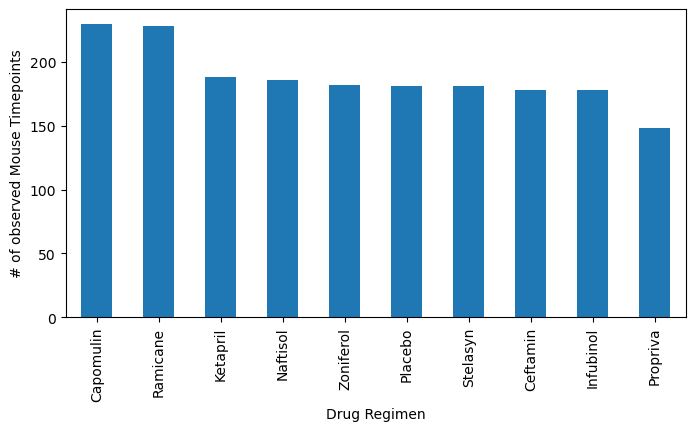

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barplot_drugvsmice = mouse_drug_values.plot(kind='bar', figsize=(8,4))
barplot_drugvsmice.set_xlabel('Drug Regimen')
barplot_drugvsmice.set_ylabel('# of observed Mouse Timepoints')
barplot_drugvsmice.get_figure().savefig("Images/Pandas_barplot.png")



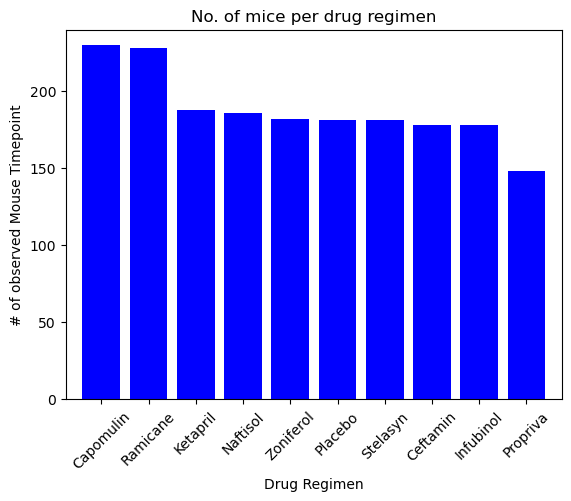

In [14]:
import numpy as np
x_axis = np.arange(len(mouse_drug_values))
plt.bar(x_axis, mouse_drug_values, color = "b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_drug_values.index, rotation =45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_drug_values)+10)
plt.title("No. of mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoint")
plt.savefig("Images/Py_barplot.png")
plt.show()


In [15]:
gender_df= clean_study_df.groupby(["Sex"])
gender_count =gender_df['Mouse ID'].count().sort_values(ascending=False)
gender_count

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64

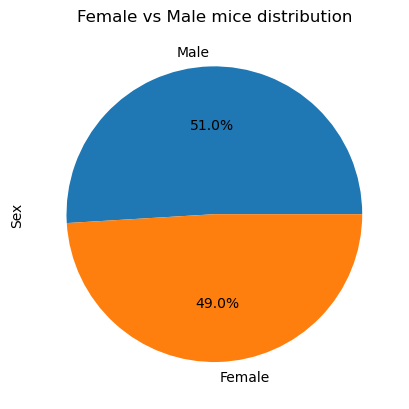

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie= gender_count.plot(kind= "pie", title= "Female vs Male mice distribution",autopct='%1.1f%%')
pie.set_ylabel("Sex")
pie.get_figure().savefig("Images/Pie_pandas.png")
#plt.axis("equal")

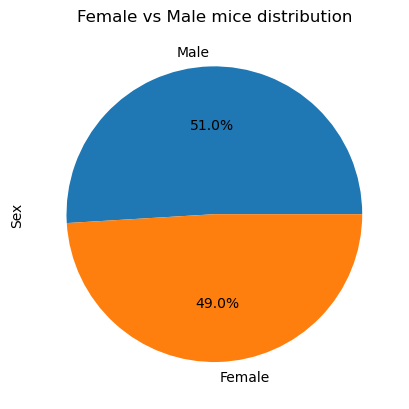

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.pie(gender_count, labels= gender_count.index, autopct="%1.1f%%")
plt.title("Female vs Male mice distribution")
plt.ylabel(gender_count.index.name)
plt.savefig("Images/Pie_pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capmoulin= clean_study_df.loc[clean_study_df["Drug Regimen"]=='Capomulin']
Ramicane= clean_study_df.loc[clean_study_df["Drug Regimen"]=='Ramicane']
Infubinol= clean_study_df.loc[clean_study_df["Drug Regimen"]=='Infubinol']
Ceftamin= clean_study_df.loc[clean_study_df["Drug Regimen"]=='Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
capmoulin_final=capmoulin.groupby(['Mouse ID']).max()['Timepoint']
Ramicane_final=Ramicane.groupby(['Mouse ID']).max()['Timepoint']
Infubinol_final=Infubinol.groupby(['Mouse ID']).max()['Timepoint']
Ceftamin_final= Ceftamin.groupby(['Mouse ID']).max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capmoulin_merge=pd.merge(capmoulin_final,clean_study_df, on= ('Mouse ID', 'Timepoint'))
Ramicane_merge=pd.merge(Ramicane_final,clean_study_df, on= ('Mouse ID', 'Timepoint'))
Infubinol_merge=pd.merge(Infubinol_final,clean_study_df, on= ('Mouse ID', 'Timepoint'))
Ceftamin_merge=pd.merge(Ceftamin_final,clean_study_df, on= ('Mouse ID', 'Timepoint'))
# Merge the above 4 drug df
Final_drug_df= pd.concat([capmoulin_merge,Ramicane_merge, Infubinol_merge, Ceftamin_merge]).reset_index()
Final_drug_df


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,45,38.982878,2,Capomulin,Female,9,22
1,1,b742,45,38.939633,0,Capomulin,Male,7,21
2,2,f966,20,30.485985,0,Capomulin,Male,16,17
3,3,g288,45,37.074024,1,Capomulin,Male,3,19
4,4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...,...
95,20,x226,0,45.000000,0,Ceftamin,Male,23,28
96,21,x581,45,64.634949,3,Ceftamin,Female,19,28
97,22,x822,45,61.386660,3,Ceftamin,Male,3,29
98,23,y769,45,68.594745,4,Ceftamin,Female,6,27


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = Final_drug_df.loc[Final_drug_df['Drug Regimen'] == drugs, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol.append(tumor_volume) 
    # Determine outliers using upper and lower bounds
    quartiles=tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (tumor_volume.loc[(tumor_volume >= upper_bound) | (tumor_volume <= lower_bound)])
    print(f"{drugs}'s potential outliers: {outliers}")
   




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


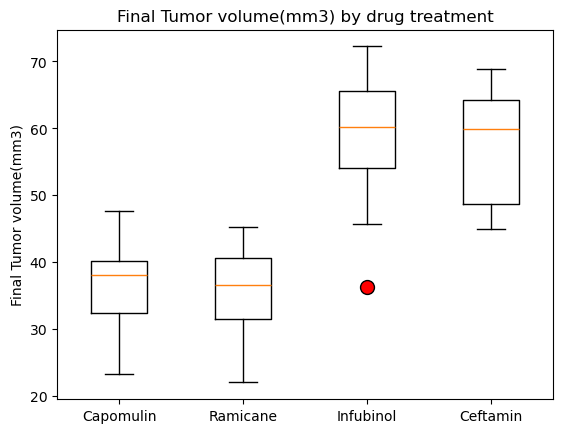

In [20]:
#Creating box plot for the treatment drugs
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol,flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'Red'})
ax1.set_xticklabels(treatments)
ax1.set_title('Final Tumor volume(mm3) by drug treatment')
ax1.set_ylabel('Final Tumor volume(mm3)')
plt.savefig("Images/treatmentdrug_boxplot.png")



## Line and Scatter Plots

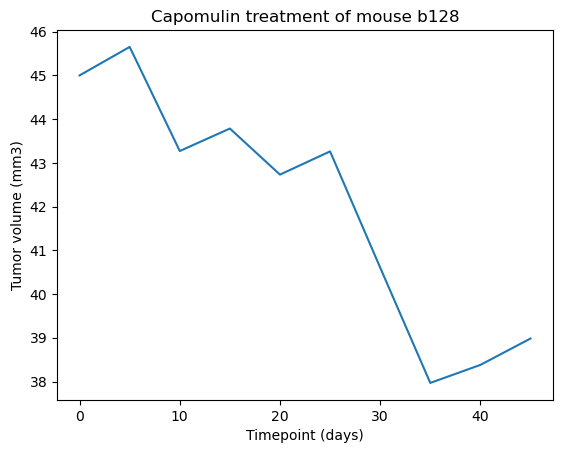

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#selecting mouse ID: b128
mouse_b128 = clean_study_df[clean_study_df['Mouse ID']== 'b128']
line_plot = mouse_b128.plot(x="Timepoint", y="Tumor Volume (mm3)", kind= 'line', legend= False)
line_plot.set_xlabel('Timepoint (days)')
line_plot.set_ylabel('Tumor volume (mm3)')
line_plot.set_title('Capomulin treatment of mouse b128')
line_plot.get_figure().savefig("Images/b128_lineplot.png")




In [22]:
mouse_b128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


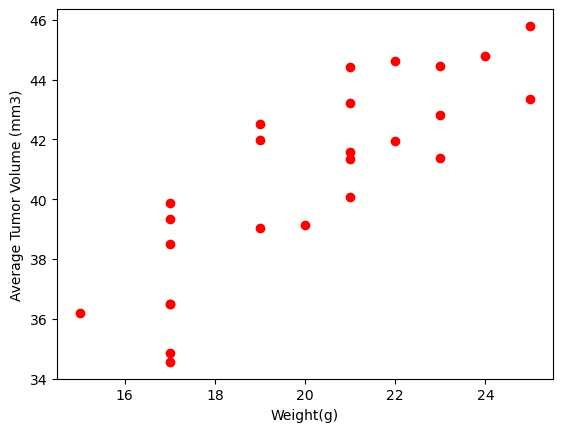

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_average_tumor = capmoulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
Capomulin_average_weight = capmoulin.groupby(['Mouse ID'])['Weight (g)'].mean()
plt.scatter(Capomulin_average_weight, Capomulin_average_tumor, color= "red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("Images/Scatter_weightvstumorvolume.png")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume factors is 0.84


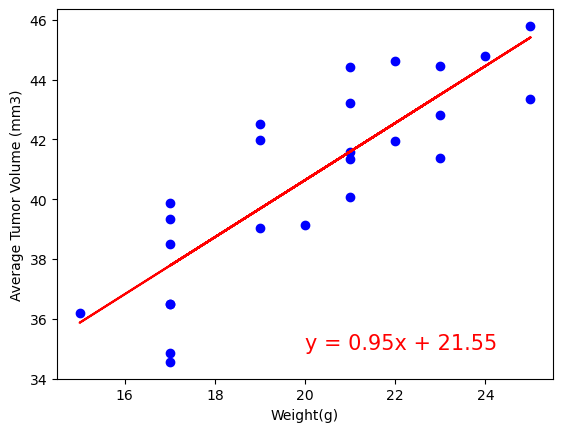

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(Capomulin_average_weight,Capomulin_average_tumor)
print(f"The correlation between mouse weight and average tumor volume factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_average_weight, Capomulin_average_tumor)
regress_values =Capomulin_average_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Capomulin_average_weight, Capomulin_average_tumor, color= "blue")
plt.plot(Capomulin_average_weight,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("Images/regress_analysis.png")
plt.show()
